In [31]:
import numpy as np
import sklearn as skl
import functions as fx
import matplotlib.pyplot as plt
import sklearn.model_selection as sklm

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 

In [32]:
n               = 20
x               = np.sort(np.random.uniform(0, 1, n))
y               = np.sort(np.random.uniform(0, 1, n))
noise_level     = 0.01

design_matrix   = fx.DesignDesign(x,y,5)
x_m, y_m        = np.meshgrid(x,y)
franke          = fx.FrankeFunction(x_m, y_m, noise_level)

#### Plot Franke Function

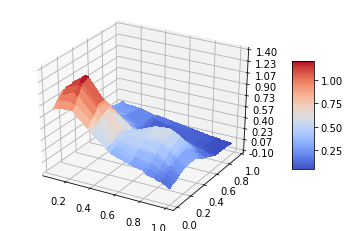

In [33]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
surf        = ax.plot_surface(x_m, y_m, franke, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### Ordinary Least Squares

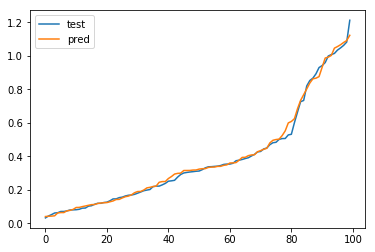

In [36]:
x_train, x_test, frank_train, frank_test = sklm.train_test_split(design_matrix,np.ravel(franke))


beta_ols   = fx.OridinaryLeastSquares(x_train,frank_train)
frank_pred = x_test @ beta_ols

pred = frank_pred.reshape((int(len(frank_pred)/n),n))

plt.plot(np.sort(frank_test), label='test')
plt.plot(np.sort(frank_pred), label='pred')
plt.legend()
plt.show()
